In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader as wb
from quandl import get as qdl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('bmh')

,SNC.TO,TD,^BVSP,VALE3.SA,IronOre
count,622.000000,611.000000,592.000000,592.000000,606.000000
mean,37.204110,51.852664,91697.246015,47.981510,79.673944
std,13.941416,4.425404,12469.809469,4.826191,12.089075
min,15.461376,33.382996,63570.000000,34.099998,61.600000
25%,24.000743,51.121538,81508.500000,44.701027,68.362500
50%,34.008430,52.896481,90518.000000,48.529068,80.145000
75%,52.341807,54.769299,101151.500000,51.205673,87.312500
max,59.518909,56.965736,119528.000000,60.594360,112.080000


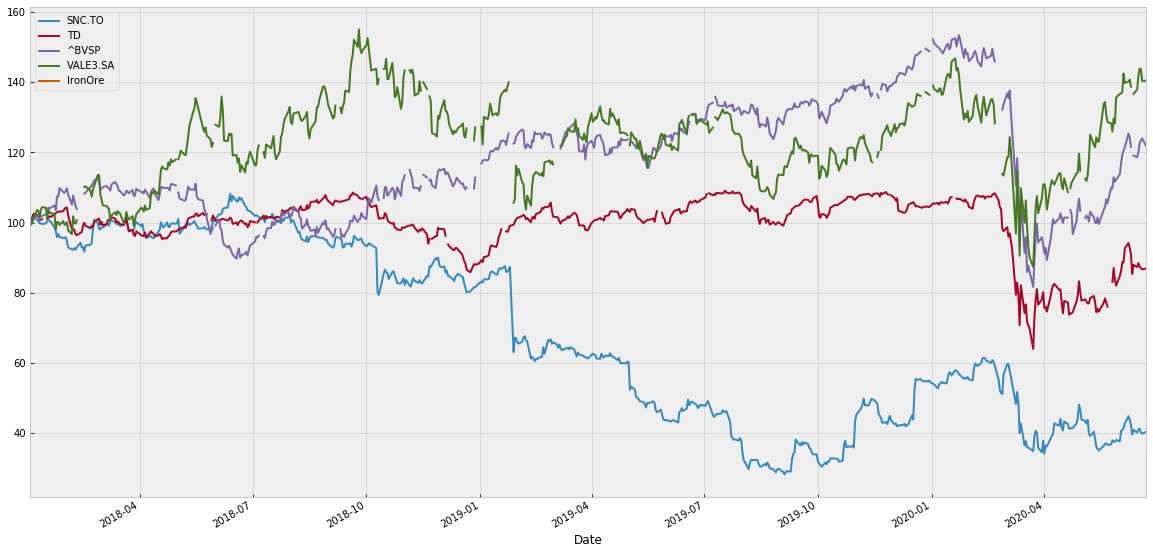

In [7]:
tickers = ['SNC.TO', 'TD', '^BVSP', 'VALE3.SA', 'BTC-USD', 'GC']
df = pd.DataFrame()
for t in tickers:
    try:
        df[t] = wb(t, data_source='yahoo', start='2018-01-01')['Adj Close']
    except:
        pass

df['IronOre'] = qdl('CHRIS/CME_TIO3-Iron-Ore-62-Fe-CFR-China-TSI-Futures-Continuous-Contract-3-TIO3')['Settle']

(df / df.iloc[0] * 100).plot(figsize=(20,10))
df.describe()

In [8]:
df.tail(7)

,SNC.TO,TD,^BVSP,VALE3.SA,IronOre
Date,,,,,
2020-06-12,22.469999,45.900002,92795.000000,53.400002,99.00
2020-06-15,22.010000,45.590000,92376.000000,53.880001,97.45
2020-06-16,22.549999,46.169998,93531.000000,55.389999,99.30
2020-06-17,22.660000,45.610001,95547.000000,56.200001,97.98
2020-06-18,22.040001,45.419998,96125.000000,56.169998,97.15
2020-06-19,21.860001,45.240002,96572.000000,54.849998,97.49
2020-06-22,22.139999,45.349998,95059.640625,54.869999,NaN


In [9]:
log_returns = np.log(df / df.shift(1))

std_returns = log_returns.std()

var_returns = log_returns.var() * 250 ** 0.5

cov_returns = log_returns.cov() * 250

cor_returns = log_returns.corr()

In [10]:
log_returns.tail()

,SNC.TO,TD,^BVSP,VALE3.SA,IronOre
Date,,,,,
2020-06-16,0.024238,0.012642,0.012426,0.027640,0.018806
2020-06-17,0.004866,-0.012203,0.021325,0.014518,-0.013382
2020-06-18,-0.027742,-0.004175,0.006031,-0.000534,-0.008507
2020-06-19,-0.008201,-0.003971,0.004639,-0.023781,0.003494
2020-06-22,0.012727,0.002428,-0.015784,0.000365,NaN


In [11]:
std_returns * 100

SNC.TO      3.323442
TD          1.820334
^BVSP       2.068496
VALE3.SA    2.700341
IronOre     1.956573
dtype: float64

In [12]:
var_returns * 100

SNC.TO      1.746410
TD          0.523929
^BVSP       0.676518
VALE3.SA    1.152941
IronOre     0.605288
dtype: float64

In [13]:
cov_returns

,SNC.TO,TD,^BVSP,VALE3.SA,IronOre
SNC.TO,0.276132,0.073370,0.072762,0.075760,0.013398
TD,0.073370,0.082840,0.072056,0.080936,0.015638
^BVSP,0.072762,0.072056,0.106967,0.096722,0.011957
VALE3.SA,0.075760,0.080936,0.096722,0.182296,0.037682
IronOre,0.013398,0.015638,0.011957,0.037682,0.095704


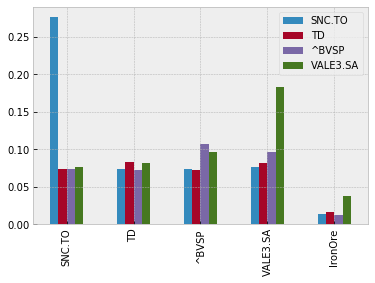

In [14]:
cov_returns[tickers].plot(kind='bar')

In [15]:
cor_returns

,SNC.TO,TD,^BVSP,VALE3.SA,IronOre
SNC.TO,1.000000,0.478521,0.458832,0.365952,0.080905
TD,0.478521,1.000000,0.753532,0.649806,0.174687
^BVSP,0.458832,0.753532,1.000000,0.692647,0.116380
VALE3.SA,0.365952,0.649806,0.692647,1.000000,0.282054
IronOre,0.080905,0.174687,0.116380,0.282054,1.000000


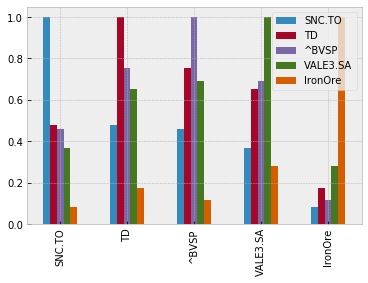

In [16]:
cor_returns.plot(kind='bar')

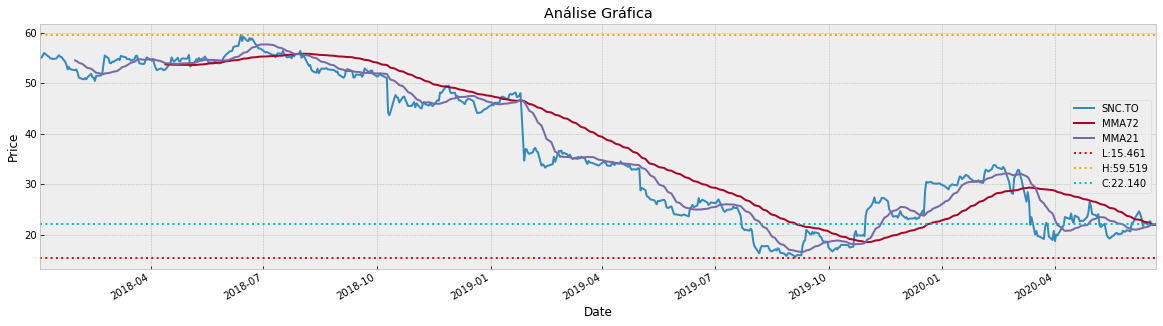

In [17]:
df[tickers[0]].plot(figsize=(20,5))
df[tickers[0]].rolling(72).mean().plot(label='MMA72')
df[tickers[0]].rolling(21).mean().plot(label='MMA21')

plt.axhline(df[tickers[0]].min(), color='r', linestyle=':', label=f'L:{df[tickers[0]].min():0.3f}')
plt.axhline(df[tickers[0]].max(), color='orange', linestyle=':', label=f'H:{df[tickers[0]].max():0.3f}')
plt.axhline(df[tickers[0]].iloc[-1], color='c', linestyle=':', label=f'C:{df[tickers[0]].iloc[-1]:0.3f}')

plt.title('Análise Gráfica')

plt.ylabel('Price')

plt.legend()

plt.show()